In [1]:
# Dependencies
import requests
import matplotlib.pyplot as plt
import requests
from scipy import stats
import pandas as pd
from pprint import pprint
from citipy import citipy
import json
from api_rona import covid_key
import matplotlib.dates as mdates


print(covid_key)

url = "https://api.covidactnow.org/v2/county/29095.timeseries.json?apiKey=" + covid_key + "&t="
print(url)


93a5df723f214f0f9dac171c43b18a1b
https://api.covidactnow.org/v2/county/29095.timeseries.json?apiKey=93a5df723f214f0f9dac171c43b18a1b&t=


In [2]:
response = requests.get(url).json()
response

{'fips': '29095',
 'country': 'USA',
 'state': 'MO',
 'county': 'Jackson County',
 'level': 'county',
 'lat': None,
 'locationId': 'iso1:us#iso2:us-mo#fips:29095',
 'long': None,
 'population': 703011,
 'metrics': {'testPositivityRatio': 0.044000000000000004,
  'testPositivityRatioDetails': {'source': 'other'},
  'caseDensity': 5.100509502289844,
  'contactTracerCapacityRatio': None,
  'infectionRate': 0.763212578025,
  'infectionRateCI90': 0.212409579141,
  'icuHeadroomRatio': 0.3273257541913956,
  'icuHeadroomDetails': {'currentIcuCovid': 35,
   'currentIcuCovidMethod': 'estimated',
   'currentIcuNonCovid': 128,
   'currentIcuNonCovidMethod': 'estimated_from_typical_utilization'},
  'icuCapacityRatio': 0.7948408287628982,
  'vaccinationsInitiatedRatio': 0.10798124069182417,
  'vaccinationsCompletedRatio': 0.05352405581135999},
 'riskLevels': {'overall': 1,
  'testPositivityRatio': 1,
  'caseDensity': 1,
  'contactTracerCapacityRatio': 4,
  'infectionRate': 0,
  'icuHeadroomRatio': 0,

In [3]:
state_df = pd.DataFrame(response['actualsTimeseries'])
state_df

,cases,deaths,positiveTests,negativeTests,contactTracers,hospitalBeds,icuBeds,newCases,date,vaccinesDistributed,vaccinationsInitiated,vaccinationsCompleted
0,NaN,NaN,None,None,None,"{'capacity': None, 'currentUsageTotal': None, ...","{'capacity': None, 'currentUsageTotal': None, ...",NaN,2020-01-22,NaN,NaN,NaN
1,NaN,NaN,None,None,None,"{'capacity': None, 'currentUsageTotal': None, ...","{'capacity': None, 'currentUsageTotal': None, ...",NaN,2020-01-23,NaN,NaN,NaN
2,NaN,NaN,None,None,None,"{'capacity': None, 'currentUsageTotal': None, ...","{'capacity': None, 'currentUsageTotal': None, ...",NaN,2020-01-24,NaN,NaN,NaN
3,NaN,NaN,None,None,None,"{'capacity': None, 'currentUsageTotal': None, ...","{'capacity': None, 'currentUsageTotal': None, ...",NaN,2020-01-25,NaN,NaN,NaN
4,NaN,NaN,None,None,None,"{'capacity': None, 'currentUsageTotal': None, ...","{'capacity': None, 'currentUsageTotal': None, ...",NaN,2020-01-26,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
400,30055.0,378.0,None,None,None,"{'capacity': None, 'currentUsageTotal': 1628, ...","{'capacity': 238, 'currentUsageTotal': 189, 'c...",47.0,2021-02-25,NaN,63637.0,34125.0
401,30082.0,380.0,None,None,None,"{'capacity': None, 'currentUsageTotal': None, ...","{'capacity': None, 'currentUsageTotal': None, ...",27.0,2021-02-26,NaN,66958.0,35773.0
402,30116.0,381.0,None,None,None,"{'capacity': None, 'currentUsageTotal': None, ...","{'capacity': None, 'currentUsageTotal': None, ...",34.0,2021-02-27,NaN,70363.0,37319.0
403,30131.0,381.0,None,None,None,"{'capacity': None, 'currentUsageTotal': None, ...","{'capacity': None, 'currentUsageTotal': None, ...",15.0,2021-02-28,NaN,74430.0,37613.0


In [4]:
mo_df = pd.DataFrame(state_df [['date','cases','deaths','newCases']])
mo_df

,date,cases,deaths,newCases
0,2020-01-22,NaN,NaN,NaN
1,2020-01-23,NaN,NaN,NaN
2,2020-01-24,NaN,NaN,NaN
3,2020-01-25,NaN,NaN,NaN
4,2020-01-26,NaN,NaN,NaN
...,...,...,...,...
400,2021-02-25,30055.0,378.0,47.0
401,2021-02-26,30082.0,380.0,27.0
402,2021-02-27,30116.0,381.0,34.0
403,2021-02-28,30131.0,381.0,15.0


In [5]:
pd.to_datetime(mo_df["date"])

0     2020-01-22
1     2020-01-23
2     2020-01-24
3     2020-01-25
4     2020-01-26
         ...    
400   2021-02-25
401   2021-02-26
402   2021-02-27
403   2021-02-28
404   2021-03-01
Name: date, Length: 405, dtype: datetime64[ns]

In [6]:
mo_df["date"]=pd.to_datetime(mo_df["date"]) 

In [20]:
print(mo_df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 405 entries, 0 to 404
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   date      405 non-null    datetime64[ns]
 1   cases     350 non-null    float64       
 2   deaths    350 non-null    float64       
 3   newCases  346 non-null    float64       
dtypes: datetime64[ns](1), float64(3)
memory usage: 12.8 KB
None


In [8]:
mo_df.fillna(0)
pd.set_option("display.max_rows", None, "display.max_columns", None)
print (mo_df)

          date    cases  deaths  newCases
0   2020-01-22      NaN     NaN       NaN
1   2020-01-23      NaN     NaN       NaN
2   2020-01-24      NaN     NaN       NaN
3   2020-01-25      NaN     NaN       NaN
4   2020-01-26      NaN     NaN       NaN
5   2020-01-27      NaN     NaN       NaN
6   2020-01-28      NaN     NaN       NaN
7   2020-01-29      NaN     NaN       NaN
8   2020-01-30      NaN     NaN       NaN
9   2020-01-31      NaN     NaN       NaN
10  2020-02-01      NaN     NaN       NaN
11  2020-02-02      NaN     NaN       NaN
12  2020-02-03      NaN     NaN       NaN
13  2020-02-04      NaN     NaN       NaN
14  2020-02-05      NaN     NaN       NaN
15  2020-02-06      NaN     NaN       NaN
16  2020-02-07      NaN     NaN       NaN
17  2020-02-08      NaN     NaN       NaN
18  2020-02-09      NaN     NaN       NaN
19  2020-02-10      NaN     NaN       NaN
20  2020-02-11      NaN     NaN       NaN
21  2020-02-12      NaN     NaN       NaN
22  2020-02-13      NaN     NaN   

<Figure size 432x288 with 0 Axes>

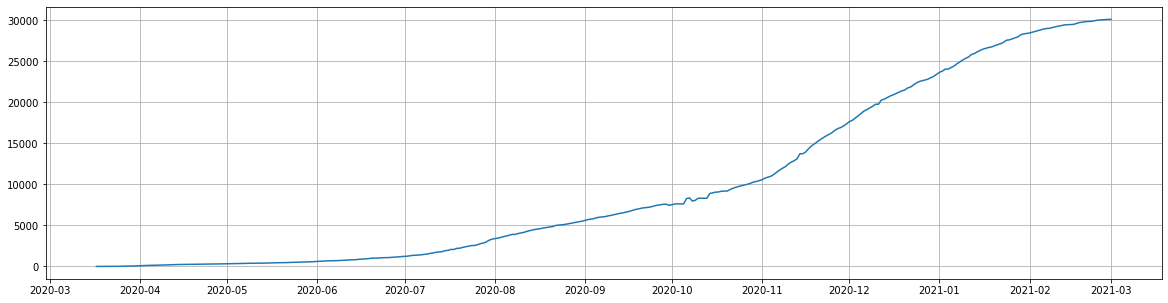

In [18]:
plt.figure()
plt.figure(figsize=(20,5))
plt.plot(mo_df['date'], mo_df['cases'])
ax = plt.gca()
ax.xaxis.set_major_locator(mdates.MonthLocator(interval=1))
#ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%D-%M'))
#plt.gcf().autofmt_xdate() # Rotation

plt.grid(True)
plt.show()

<Figure size 432x288 with 0 Axes>

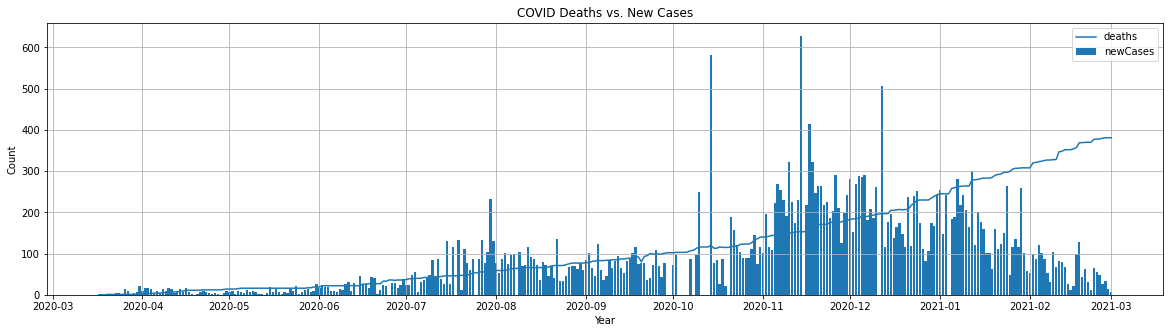

In [40]:
plt.figure()
plt.figure(figsize=(20,5))
deaths=plt.plot(mo_df['date'], mo_df['deaths'], label="deaths")
newCases= plt.bar(mo_df['date'], mo_df['newCases'], label = "newCases")
ax = plt.gca()
ax.xaxis.set_major_locator(mdates.MonthLocator(interval=1))
#ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%D-%M'))
#plt.gcf().autofmt_xdate() # Rotation
plt.legend (loc="upper right")
plt.title('COVID Deaths vs. New Cases')
plt.xlabel("Year")
plt.ylabel("Count")
plt.grid(True)
plt.show()

In [41]:
before_df = mo_df[(mo_df['date'] > '2020-01-1') & (mo_df['date'] <= '2020-03-16')]
before_df

,date,cases,deaths,newCases
0,2020-01-22,NaN,NaN,NaN
1,2020-01-23,NaN,NaN,NaN
2,2020-01-24,NaN,NaN,NaN
3,2020-01-25,NaN,NaN,NaN
4,2020-01-26,NaN,NaN,NaN
5,2020-01-27,NaN,NaN,NaN
6,2020-01-28,NaN,NaN,NaN
7,2020-01-29,NaN,NaN,NaN
8,2020-01-30,NaN,NaN,NaN
9,2020-01-31,NaN,NaN,NaN


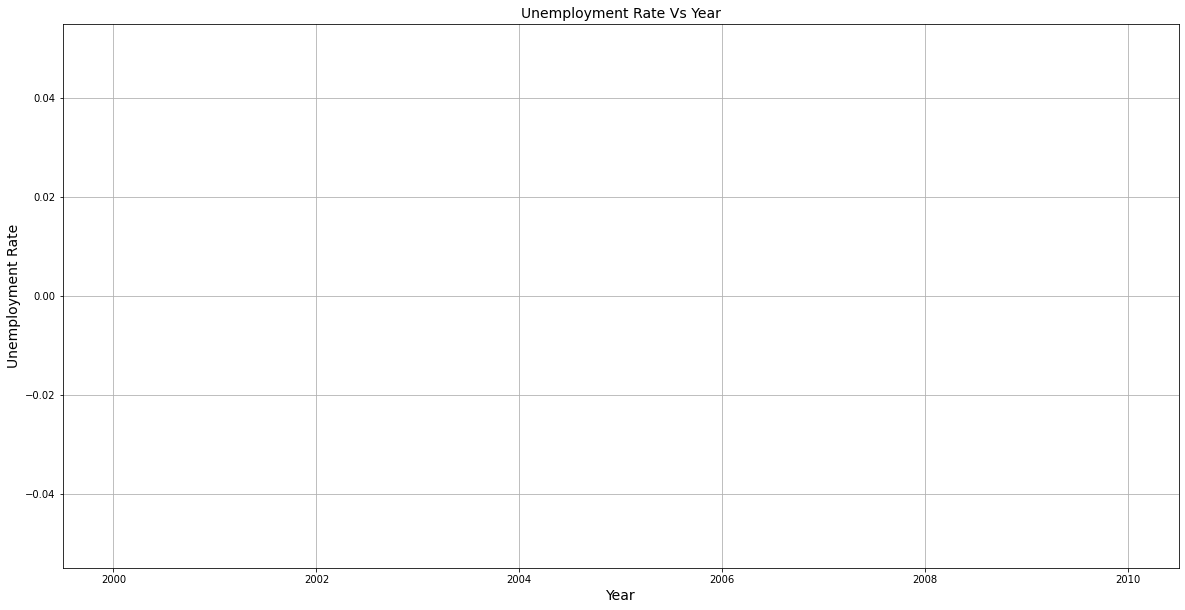

In [64]:
plt.figure(figsize=(20,10))
plt.plot(before_df['date'], before_df['cases'], before_df['deaths'], before_df['newCases'], color='red', marker='o')
plt.title('Unemployment Rate Vs Year', fontsize=14)
plt.xlabel('Year', fontsize=14)
plt.ylabel('Unemployment Rate', fontsize=14)
plt.grid(True)
plt.show()

In [42]:
firstqtr_df = mo_df[(mo_df['date'] > '2020-03-01') & (mo_df['date'] <= '2020-06-30')]
firstqtr_df

,date,cases,deaths,newCases
40,2020-03-02,NaN,NaN,NaN
41,2020-03-03,NaN,NaN,NaN
42,2020-03-04,NaN,NaN,NaN
43,2020-03-05,NaN,NaN,NaN
44,2020-03-06,NaN,NaN,NaN
45,2020-03-07,NaN,NaN,NaN
46,2020-03-08,NaN,NaN,NaN
47,2020-03-09,NaN,NaN,NaN
48,2020-03-10,NaN,NaN,NaN
49,2020-03-11,NaN,NaN,NaN
